<a href="https://colab.research.google.com/github/vinayp1210/python/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmean clustering with centroid

In [ ]:
import numpy as np
data = np.array([[1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
                 [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]])
centroids = np.array([[1.0, 1.0],
                      [5.0,7.0]])
def assign_to_clusters(data, centroids):
  distances = np.sqrt(np.sum((data[:, np.newaxis, :] - centroids) ** 2, axis = 2))
  cluster_assignments = np.argmin(distances, axis = 1)
  return cluster_assignments
def update_centroids(data, cluster_assignments, centroids):
  new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(len(centroids))])
  return new_centroids
max_iterations = 100
for _ in range(max_iterations):
  cluster_assignments = assign_to_clusters(data.T, centroids)
  new_centroids = update_centroids(data.T, cluster_assignments, centroids)
  if np.all(centroids == new_centroids):
    break
  centroids = new_centroids
print("Final centroids:\n", centroids)
print("cluster assignment:\n", cluster_assignments)

Final centroids:
 [[1.25 1.5 ]
 [3.9  5.1 ]]
cluster assignment:
 [0 0 1 1 1 1 1]


Kmean with blobs

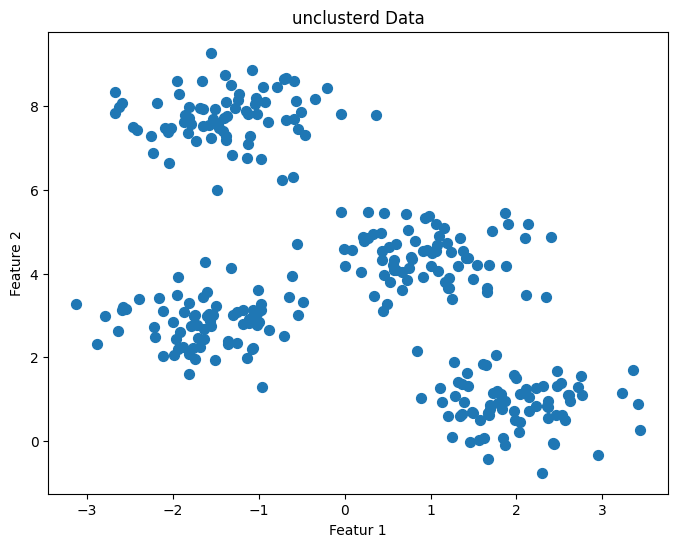

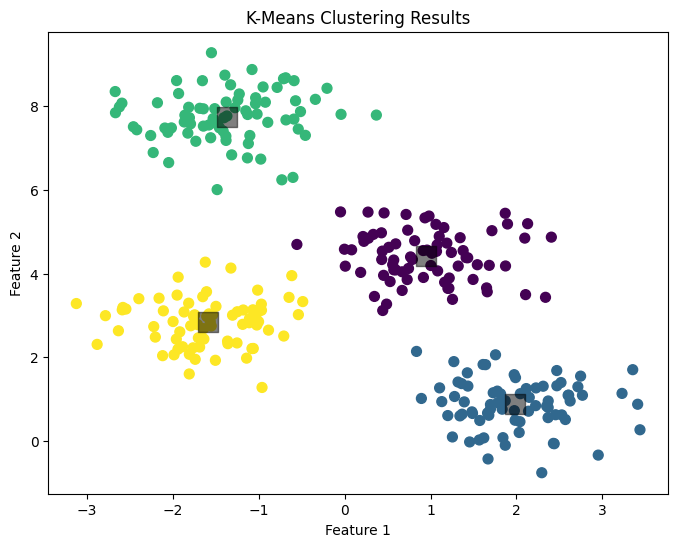

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('unclusterd Data')
plt.xlabel('Featur 1')
plt.ylabel('Feature 2')
plt.show()

kmeans =KMeans(n_clusters =4, random_state=0, n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha =0.5, marker='s')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Choosing optimal K-Elbow Method

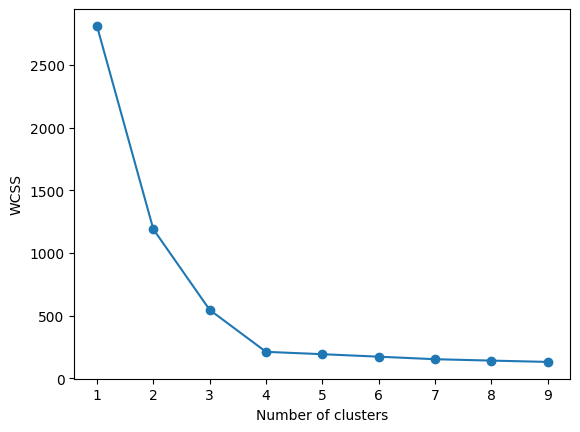

In [12]:
wcss =[]
for k in range(1,10):
  km = KMeans(n_clusters= k)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
